## Wczytanie bibliotek

In [117]:
import os
import pandas as pd
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

## Przygotowanie metadanych
W tej części projektu pobrałem wszelkie informację o nazwach plików, etykietach oraz utworzyłem indeksy dla każdej etykiety. Dodatkowo wykryłem że są dla foldery dla pokemona Mr. Mime, dlatego wczytałem wszystkie zdjęcia i dodałem odpowiednie etykiety.

### Stworzenie DataFrame z metadanymi

In [99]:
folders = os.listdir("data/pokemon")
describition_data = defaultdict(list)
for i, folder in enumerate(folders):
    paths = os.listdir("data/pokemon/" + folder)
    describition_data["directory"].extend([folder for _ in range(len(paths))])
    if folder == "MrMime":
        folder = "Mr. Mime"
    describition_data["filepath"].extend(paths)
    describition_data["label"].extend([folder for _ in range(len(paths))])

In [100]:
df_data_info = pd.DataFrame(describition_data)
df_data_info['filepath'] = df_data_info['filepath'].str.replace('.PNG', '.png')
df_data_info['filepath'] = df_data_info['filepath'].str.replace('.JPG', '.jpg')

In [101]:
labels = list(df_data_info.label.unique())
label2id = {label: i for i, label in enumerate(labels)}
df_data_info['label_id'] = df_data_info.label.apply(lambda x: label2id[x])
df_data_info

,directory,filepath,label,label_id
0,Abra,00000000.png,Abra,0
1,Abra,00000001.png,Abra,0
2,Abra,00000003.png,Abra,0
3,Abra,00000004.png,Abra,0
4,Abra,00000006.png,Abra,0
...,...,...,...,...
17258,Zubat,dd387067380e4d1f8672c30d4b567fac.jpg,Zubat,141
17259,Zubat,e1997a18e61641a4b0e701f6bc4c70f4.jpg,Zubat,141
17260,Zubat,e6cba9a117d64d849fcc389e04e92e11.jpg,Zubat,141
17261,Zubat,f8788465c10a4ab8bb0aeb992ec060ce.jpg,Zubat,141


### Weryfikacja błędnych plików

In [102]:
len(df_data_info[df_data_info['filepath'].str.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))])

17261

In [103]:
filtered_data = df_data_info[df_data_info['filepath'].str.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

In [104]:
df_data_info[~df_data_info['filepath'].str.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

,directory,filepath,label,label_id
58,Abra,desktop.ini,Abra,0
15126,Tentacruel,d6fb0a3046364ea2b49525c6f6b966e5.svg,Tentacruel,126


Udało mi się znaleźć dwa pliki które nie są zdjęciami jest to plik desktop.ini oraz d6fb0a3046364ea2b49525c6f6b966e5.svg. Nie zostaną one włączone w zestaw danych.

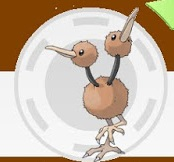

In [105]:
img = Image.open("data/pokemon/Doduo/00000230.bmp")
display(img)

### Analiza duplikatów

In [106]:
filtered_data['filename_without_extension'] = filtered_data['filepath'].str.replace(r'\.(png|jpg|jpeg|gif|bmp)$', '', regex=True)
sum(filtered_data[['label', 'label_id', 'filename_without_extension']].duplicated())

C:\Users\urbii\AppData\Local\Temp\ipykernel_40136\1831872831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['filename_without_extension'] = filtered_data['filepath'].str.replace(r'\.(png|jpg|jpeg|gif|bmp)$', '', regex=True)


79

In [107]:
filtered_data[filtered_data[['label', 'label_id', 'filename_without_extension']].duplicated()]

,directory,filepath,label,label_id,filename_without_extension
947,Bulbasaur,00000006.png,Bulbasaur,9,00000006
949,Bulbasaur,00000007.png,Bulbasaur,9,00000007
957,Bulbasaur,00000014.png,Bulbasaur,9,00000014
959,Bulbasaur,00000015.png,Bulbasaur,9,00000015
964,Bulbasaur,00000019.png,Bulbasaur,9,00000019
...,...,...,...,...,...
14235,Squirtle,00000044.png,Squirtle,120,00000044
14237,Squirtle,00000045.png,Squirtle,120,00000045
14241,Squirtle,00000050.png,Squirtle,120,00000050
14247,Squirtle,00000055.png,Squirtle,120,00000055


In [108]:
filtered_data[(filtered_data.filename_without_extension == "00000006") & (filtered_data.label == "Bulbasaur")]

,directory,filepath,label,label_id,filename_without_extension
946,Bulbasaur,00000006.jpg,Bulbasaur,9,00000006
947,Bulbasaur,00000006.png,Bulbasaur,9,00000006


(1057, 1132)


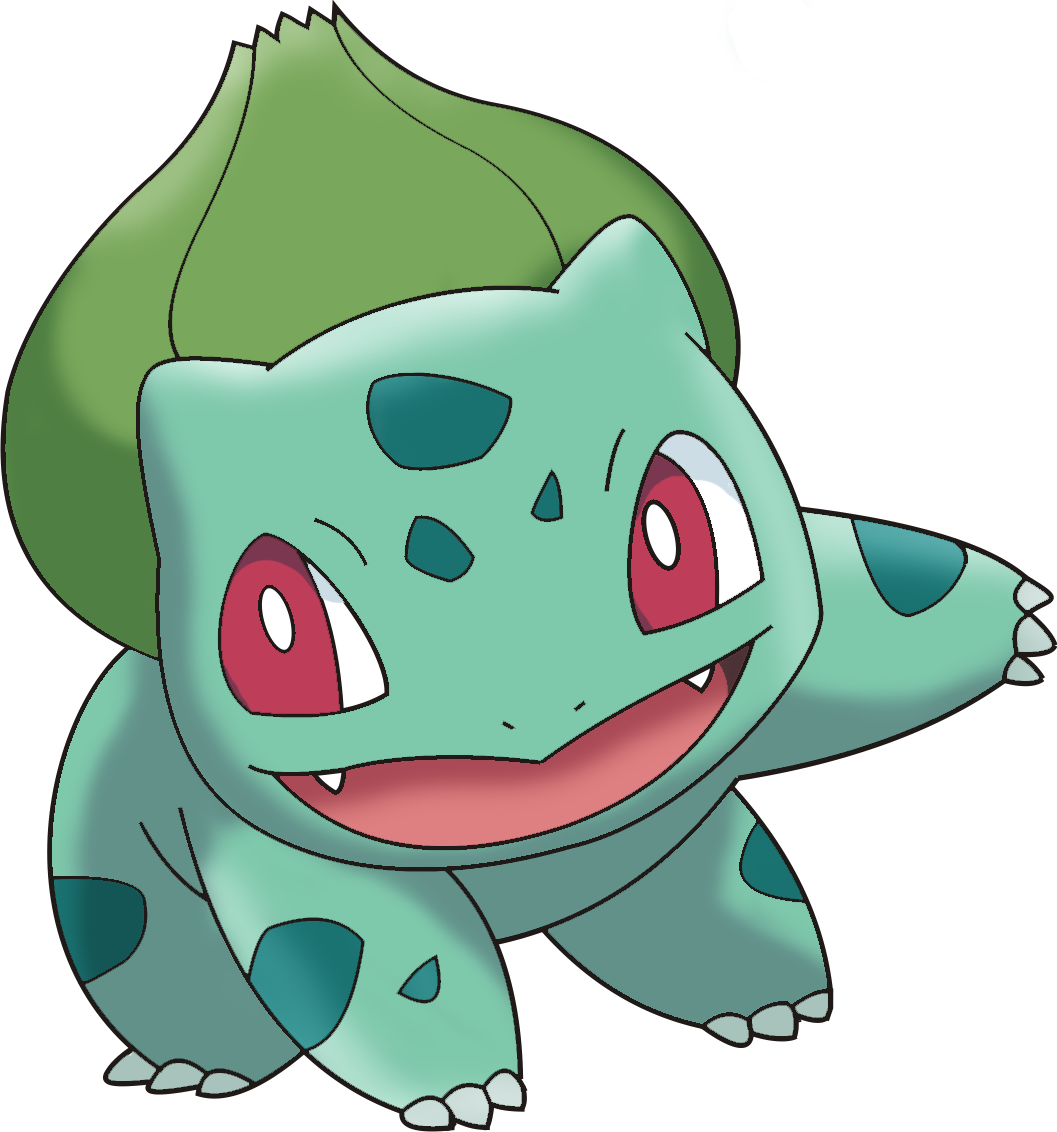

In [109]:
img = Image.open("data/pokemon/Bulbasaur/00000006.jpg")
print(img.size)
display(img)

(800, 712)


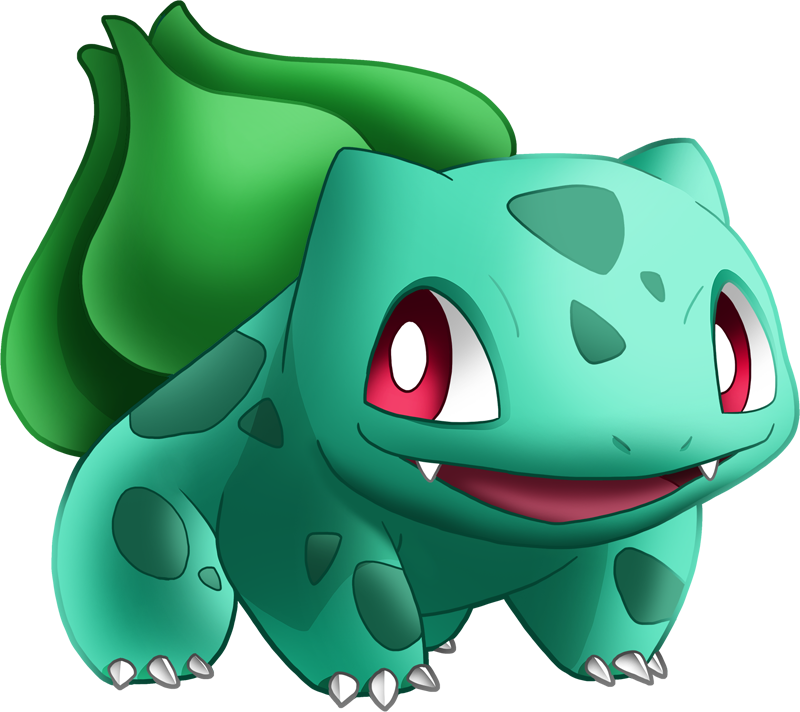

In [110]:
img = Image.open("data/pokemon/Bulbasaur/00000006.png")
print(img.size)
display(img)

Aby zweryfikować czy dane zdjęcia się nie powtarzają, a są zapisane w innych formatach. Usunąłem rozszerzenia i sprawdzałem czy nie ma zduplikowanych wierszy z użyciem trzech kolumn label, label_id oraz filename_without_extension. Jeśli dla dwóch wierszy wszystkie dane są takie same jest on duplikatem. Natomiast aby być w stu procentach pewnym wyświetliłem dwa obrazy które mają taki sam plik ale inne rozszerzenie. I okazało się że są one inne. Dlatego pozostawiam te zdjęcia w zbiorze danych. 

In [111]:
filtered_data

,directory,filepath,label,label_id,filename_without_extension
0,Abra,00000000.png,Abra,0,00000000
1,Abra,00000001.png,Abra,0,00000001
2,Abra,00000003.png,Abra,0,00000003
3,Abra,00000004.png,Abra,0,00000004
4,Abra,00000006.png,Abra,0,00000006
...,...,...,...,...,...
17258,Zubat,dd387067380e4d1f8672c30d4b567fac.jpg,Zubat,141,dd387067380e4d1f8672c30d4b567fac
17259,Zubat,e1997a18e61641a4b0e701f6bc4c70f4.jpg,Zubat,141,e1997a18e61641a4b0e701f6bc4c70f4
17260,Zubat,e6cba9a117d64d849fcc389e04e92e11.jpg,Zubat,141,e6cba9a117d64d849fcc389e04e92e11
17261,Zubat,f8788465c10a4ab8bb0aeb992ec060ce.jpg,Zubat,141,f8788465c10a4ab8bb0aeb992ec060ce


In [112]:
df_data_info[df_data_info['filepath'].str.endswith('.gif')]

,directory,filepath,label,label_id
6,Abra,00000008.gif,Abra,0
12,Abra,00000034.gif,Abra,0
67,Aerodactyl,00000009.gif,Aerodactyl,1
75,Aerodactyl,00000050.gif,Aerodactyl,1
77,Aerodactyl,00000059.gif,Aerodactyl,1
...,...,...,...,...
17099,Zapdos,00000124.gif,Zapdos,140
17173,Zubat,00000002.gif,Zubat,141
17186,Zubat,00000017.gif,Zubat,141
17200,Zubat,00000038.gif,Zubat,141


(600, 600)
[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


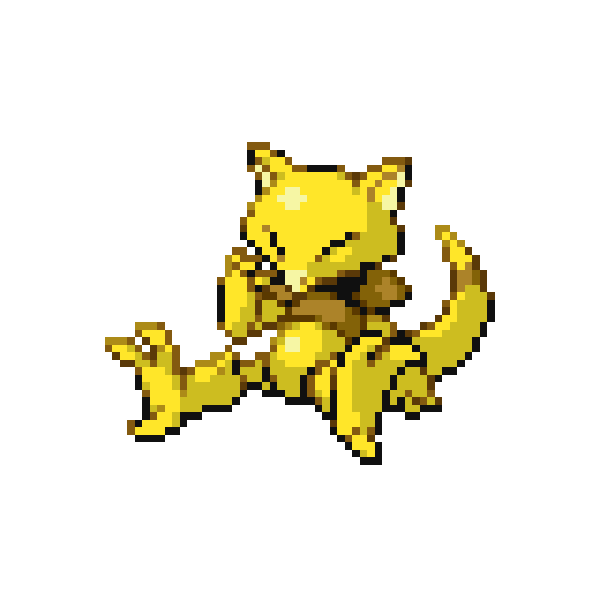

In [118]:
img = Image.open("data/pokemon/Abra/00000034.gif")
print(img.size)
print()
display(img)

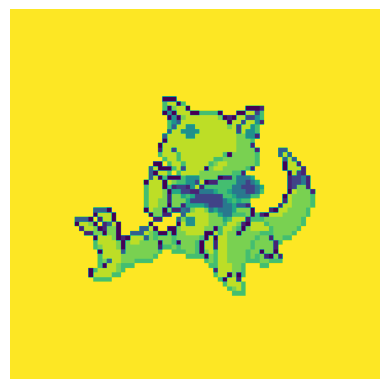

In [122]:
plt.imshow(np.array(img))
plt.axis(False)
plt.show()

Jak można zauważyć gif również można zaprezentować jako numpy array, dlatego nie zostaną one wyrzucone. Mogą one być w pewnym sensie augmentacją danych, ponieważ jak można zauważyć są one w gorszej jakości.

In [123]:
filtered_data.to_csv()

,directory,filepath,label,label_id,filename_without_extension
0,Abra,00000000.png,Abra,0,00000000
1,Abra,00000001.png,Abra,0,00000001
2,Abra,00000003.png,Abra,0,00000003
3,Abra,00000004.png,Abra,0,00000004
4,Abra,00000006.png,Abra,0,00000006
...,...,...,...,...,...
17258,Zubat,dd387067380e4d1f8672c30d4b567fac.jpg,Zubat,141,dd387067380e4d1f8672c30d4b567fac
17259,Zubat,e1997a18e61641a4b0e701f6bc4c70f4.jpg,Zubat,141,e1997a18e61641a4b0e701f6bc4c70f4
17260,Zubat,e6cba9a117d64d849fcc389e04e92e11.jpg,Zubat,141,e6cba9a117d64d849fcc389e04e92e11
17261,Zubat,f8788465c10a4ab8bb0aeb992ec060ce.jpg,Zubat,141,f8788465c10a4ab8bb0aeb992ec060ce
